<p style='color:#1262c2; font-size:32px; text-align:left'> <strong> American Insurance Disasters </strong>
</p>
<p style='color:grey; font-size:24px; text-align:right'>Estimer le coût de la couverture médicale d'un.e américain.e</p>

 <p style="color:#065ba6;"> 
  Data analyses and preprocessing<br>
  Training set/Testing set/Validation set <br>
  Model/Hyperparameters optimization <br>
  Training of the model  <br>
  Evaluation of the model <br>
  Predictions <br>
</p>

<p style="color:#560588;"> 
  Antoine Meyer<br>
  Aleksandrina Stoyanova-Christen <br>
</p>

In [114]:
import pandas as pd 
import seaborn as sns
import warnings 
import os
from sklearn.model_selection import train_test_split 
from sklearn import tree
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import tree
from scipy.stats import kurtosis
from scipy.stats import skew
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [96]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

## <font color="#1d2592"> Données Couverture Medical

#### <font color="#1d2592"> Import et description synthétique de données.

In [4]:
try :
    frais=pd.read_csv("/home/alex/SimplonIA/Enfer/CouvertureMedical/data/fraismedicals.csv", sep=",")
except FileNotFoundError:
    df = pd.read_csv('https://simplonline-v3-prod.s3.eu-west-3.amazonaws.com/media/file/csv/d51b9368-7437-420c-975c-81cac8790b68.csv')
    frais = df

In [5]:
frais.isna().sum()
frais.children.unique()

array([0, 1, 3, 2, 5, 4])

In [6]:
frais.head(4)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061


In [ ]:
import pandas_profiling
pandas_profiling.ProfileReport(frais)

In [8]:
frais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<font color="#1d2592"> **Constat** : 
> Nous disposons d'un jeu de données de 1338 enrégistrements (individus) et de 7 variables, dont 4 variables quantitatives (age, bmi, children, charges) de type int64 et float64 et 3 variables catégorielles ou qualitative (sex, region, smoker) de type objet qui seront castées en type String. Il n'y a pas des valeurs manquantes. Les valeurs 0 pour certaines variables et des enrégistrements sont des vrais valeurs.

# <font color="#1d2592"> Statistiques descriptives 

In [9]:
frais.describe() #que pour les variables numériques/quantitatives

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**<font color="#1d2592">Etude de la dispersion des distributions**

In [10]:
frais_per_region=frais.groupby(["region"]).agg({"charges":["count","mean", "median", "max", "min", "std"]})
frais_per_region

charges                                                      \
            count          mean        median          max        min   
region                                                                  
northeast     324  13406.384516  10057.652025  58571.07448  1694.7964   
northwest     325  12417.575374   8965.795750  60021.39897  1621.3402   
southeast     364  14735.411438   9294.131950  63770.42801  1121.8739   
southwest     325  12346.937377   8798.593000  52590.82939  1241.5650   

                         
                    std  
region                   
northeast  11255.803066  
northwest  11072.276928  
southeast  13971.098589  
southwest  11557.179101

In [11]:
frais_per_sex=frais.groupby(["sex"]).agg({"charges":["count","mean", "median", "max", "min", "std"]})
frais_per_sex

charges                                                                
         count          mean      median          max        min           std
sex                                                                           
female     662  12569.578844  9412.96250  63770.42801  1607.5101  11128.703801
male       676  13956.751178  9369.61575  62592.87309  1121.8739  12971.025915

In [12]:
frais_per_smoker=frais.groupby(["smoker"]).agg({"charges":["count","mean", "median", "max", "min", "std"]})
frais_per_smoker

charges                                                      \
         count          mean       median          max         min   
smoker                                                               
no        1064   8434.268298   7345.40530  36910.60803   1121.8739   
yes        274  32050.231832  34456.34845  63770.42801  12829.4551   

                      
                 std  
smoker                
no       5993.781819  
yes     11541.547176

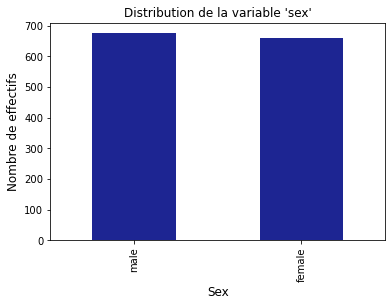

In [13]:
# Distribution de la variable "sex"
frais["sex"].value_counts(normalize=False).plot(kind='bar', color='#1d2592')
plt.title("Distribution de la variable 'sex'")
plt.xlabel('Sex', fontsize=12)
plt.ylabel("Nombre de effectifs", fontsize=12)
plt.show()

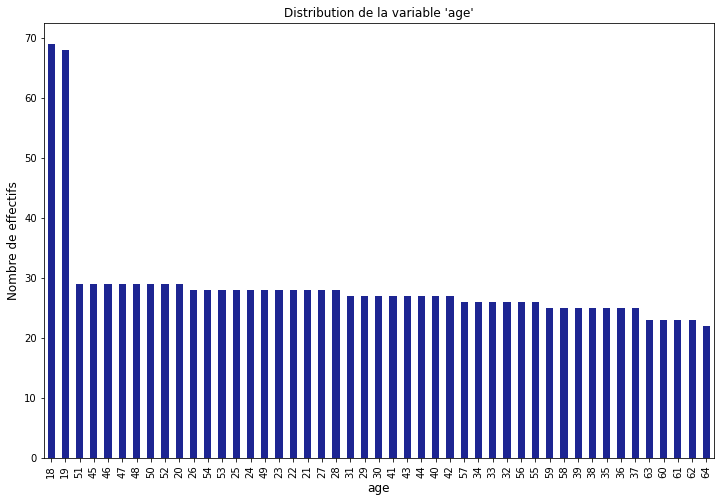

In [14]:
# Diagramme "bar chart"
fig= plt.subplots(figsize=(12,8))
frais["age"].value_counts(normalize=False).plot(kind='bar', color='#1d2592')
plt.title("Distribution de la variable 'age'")
plt.xlabel('age', fontsize=12)
plt.ylabel("Nombre de effectifs", fontsize=12)
plt.show()

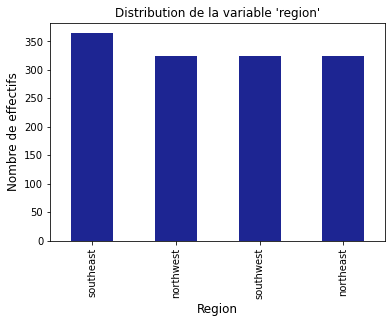

In [15]:
# Diagramme "bar chart"
frais["region"].value_counts(normalize=False).plot(kind='bar', color='#1d2592')
plt.title("Distribution de la variable 'region'")
plt.xlabel('Region', fontsize=12)
plt.ylabel("Nombre de effectifs", fontsize=12)
plt.show()

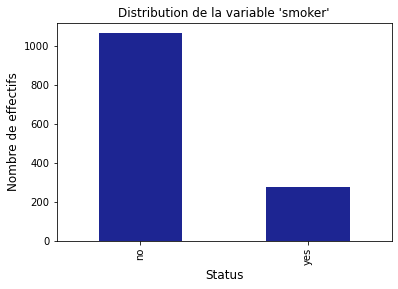

In [16]:
# Diagramme "bar chart"
frais["smoker"].value_counts(normalize=False).plot(kind='bar', color='#1d2592')
plt.title("Distribution de la variable 'smoker'")
plt.xlabel('Status', fontsize=12)
plt.ylabel("Nombre de effectifs", fontsize=12)
plt.show()

<font color="#1d2592"> **Constat** : 
    Les effectifs des modalités yes et no de la variable "smoker" sont *no*=1064, *yes*=274, respectivement. Nous observons une distribution empirique non-uniforme pour cette variable catégorielle. 

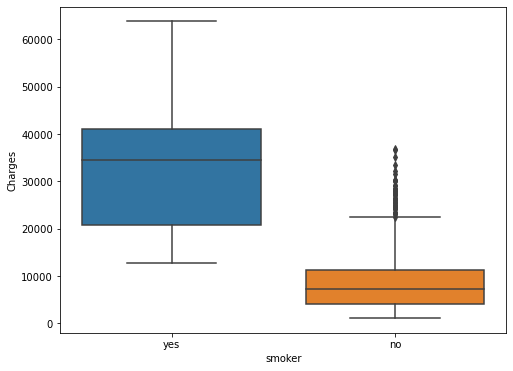

In [17]:
plt.figure(figsize=(8,6))
sns.boxplot(x='smoker',y='charges',data=frais)
plt.xlabel('smoker')
plt.ylabel('Charges')
plt.show()

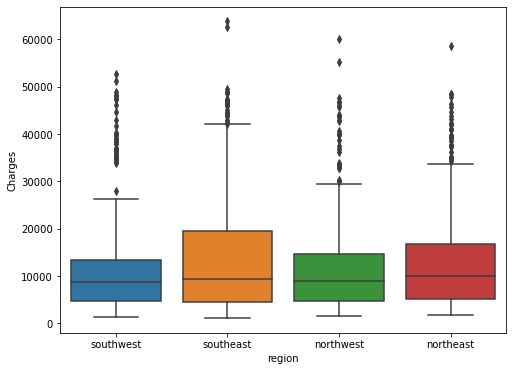

In [18]:
plt.figure(figsize=(8,6))
sns.boxplot(x='region',y='charges',data=frais)
plt.xlabel('region')
plt.ylabel('Charges')
plt.show()

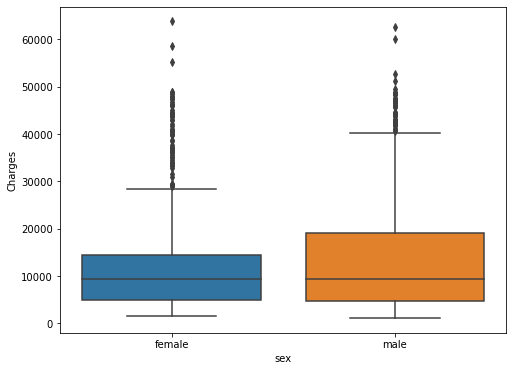

In [19]:
plt.figure(figsize=(8,6))
sns.boxplot(x='sex',y='charges',data=frais)
plt.xlabel('sex')
plt.ylabel('Charges')
plt.show()

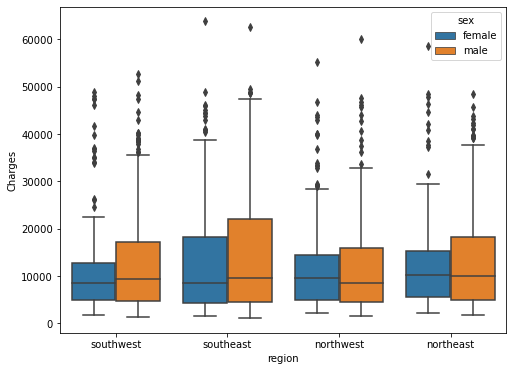

In [20]:
plt.figure(figsize=(8,6))
sns.boxplot(x='region',y='charges',data=frais, hue="sex")
plt.xlabel('region')
plt.ylabel('Charges')
plt.show()

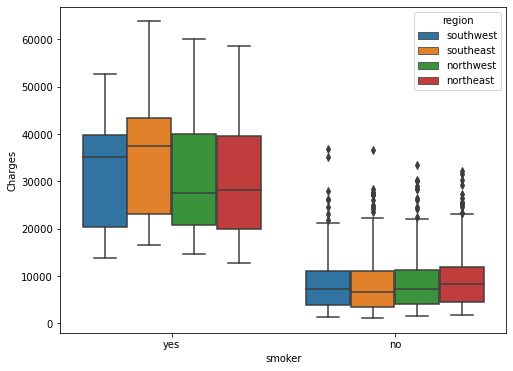

In [21]:
plt.figure(figsize=(8,6))
sns.boxplot(x='smoker',y='charges',data=frais, hue="region")
plt.xlabel('smoker')
plt.ylabel('Charges')
plt.show()

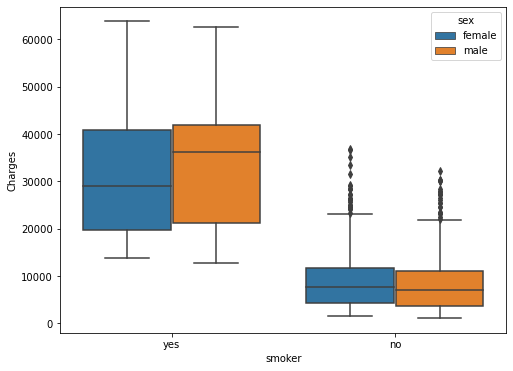

In [22]:
plt.figure(figsize=(8,6))
sns.boxplot(x='smoker',y='charges',data=frais, hue="sex")
plt.xlabel('smoker')
plt.ylabel('Charges')
plt.show()

> <p style='color:#1d2592; font-size:14px;'> On éffectue un tracé des observations (x, y) afin de nous orienter vers un modèle de régression pertinent. On observe une rélation linéaire entre les variables "charges" et "age" au sein de chaqun de trois paliers (sous-groupes de données observées sur le FIGURE "Relation charges/age en fonction des modalitées de trois variables qualitatives."). Un scatter plot ci-dessous nous montre que cette séparation est liée aux modalitées de la variable "smoker". Une rélation "linéaire" peut encore être considérée pour le nuage de points (Charges-bmi), tandis qu'une telle relation semble inadéquate pour les autres couples de variables (Charges-"variable"). 

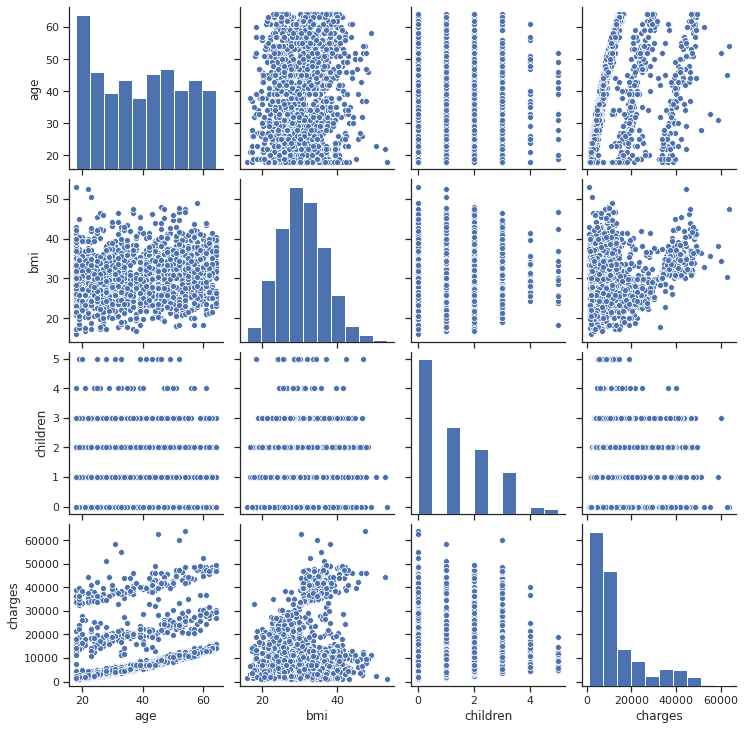

In [23]:
# sns.pairplot(frais, kind='reg', diag_kind='kde')
sns.set(style="ticks", color_codes=True)
sns.pairplot(frais)
plt.show()

In [24]:
list(frais.columns.values)

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

> Le coefficient Sk (skewness) évalue le défaut de symétrie d'une distribution. Il est nul pour une distribution symétrique (par exemple une distribution normale, ou une distribution binomiale avec p=0,5). Il est positif pour une distribution "étalée à droite". Il est négatif pour une distribution étalée à gauche.

> Le coefficient d’aplatissement (en américain, kurtosis) est un coefficient particulièrement difficile à interpréter. On sait que, dans le cas d’une loi normale, il est égal à 3, et en le comparant à cette valeur, on compare la forme de la densité observfée (l’histogramme) à celle de la loi normale (la courbe en cloche). L’interprétation consiste à expliquer les conséquences sur la forme de la densité observée d’un coefficient suprieur ou inférieur à 3.

>> Un kurtosis élevé indique que la distribution est plutôt pointue. À l'opposé, un kurtosis proche de zéro indique une distribution relativement aplatie pour une même variance.

In [25]:
dict_characteristics={"Kurtosis": [kurtosis(frais[col]) for col in ["age",'bmi', "children", "charges"]],
                      "Skew":[skew(frais[col]) for col in ["age",'bmi', "children", "charges"]]}
pd.DataFrame(dict_characteristics, index=['age', 'bmi', 'children', "charges"])

,Kurtosis,Skew
age,-1.244921,0.055610
bmi,-0.055023,0.283729
children,0.197217,0.937328
charges,1.595821,1.514180


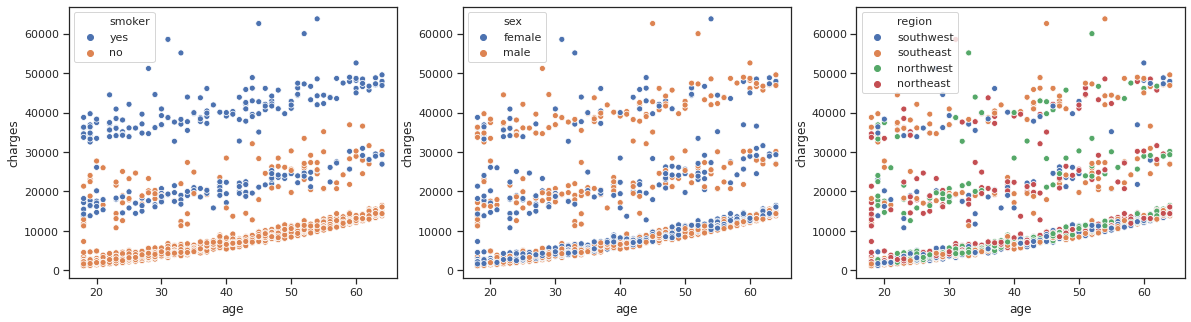

In [89]:
fig, axes = plt.subplots(1,3,figsize=(20,5))
df=frais
sns.scatterplot(data=df, x="age", y="charges", hue="smoker",ax=axes[0])
sns.scatterplot(data=df, x="age", y="charges", hue="sex",ax=axes[1])
sns.scatterplot(data=df, x="age", y="charges", hue="region",ax=axes[2])

<p style='color:#1262c2; font-size:14px;'> FIGURE "Relation charges/age en fonction des modalitées de trois variables qualitatives."

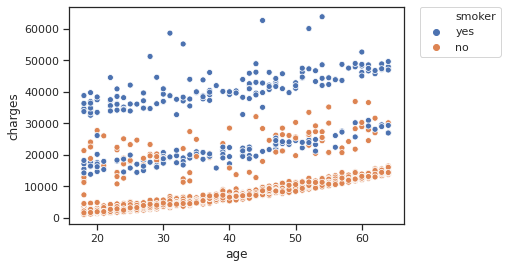

In [27]:
sns.scatterplot(data=frais, x="age", y="charges", hue="smoker")
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

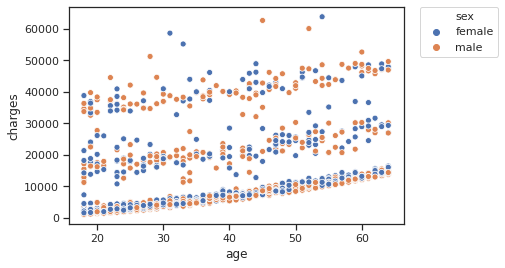

In [28]:
sns.scatterplot(data=frais, x="age", y="charges", hue="sex")
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

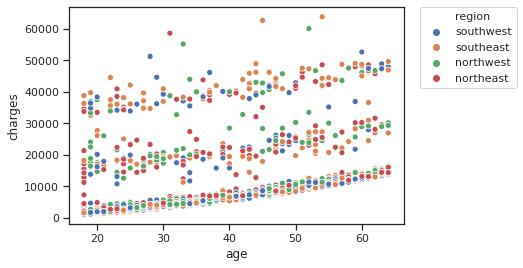

In [29]:
sns.scatterplot(data=frais, x="age", y="charges", hue="region")
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

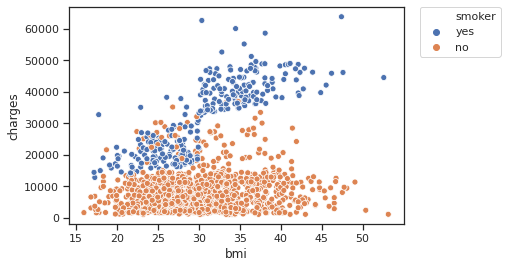

In [30]:
sns.scatterplot(data=frais, x="bmi", y="charges", hue="smoker")
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**<font color="#1d2592">À la recherche d'outliers**

In [31]:
frais["age_normalize"]=frais["age"].apply(lambda x: (x - frais["age"].mean()) / (frais["age"].max() - frais["age"].min()))

In [32]:
frais["bmi_normalize"]=frais["bmi"].apply(lambda x: (x - frais["bmi"].mean()) / (frais["bmi"].max() - frais["bmi"].min()))
frais["children_normalize"]=frais["children"].apply(lambda x: (x - frais["children"].mean()) / (frais["children"].max() - frais["children"].min()))
frais["charges_normalize"]=frais["charges"].apply(lambda x: (x - frais["charges"].mean()) / (frais["charges"].max() - frais["charges"].min()))

In [33]:
dict_explicatives_explained={"age":frais["age_normalize"], "BMI":frais["bmi_normalize"], 
                             "children":frais["children_normalize"], "charges":frais["charges_normalize"]}

Text(0, 0.5, "Valeurs d'effectifs (données normalisées)")

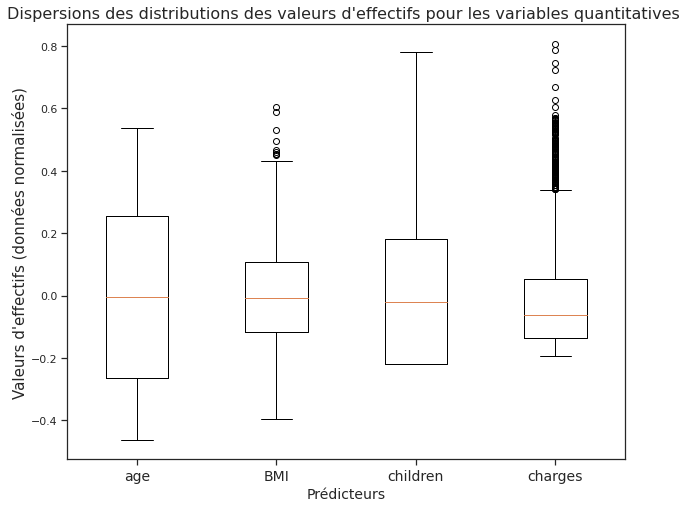

In [34]:
fig,ax = plt.subplots(figsize=(10,8))
ax.boxplot(dict_explicatives_explained.values())
ax.set_xticklabels(dict_explicatives_explained.keys(), fontsize=14)
plt.title("Dispersions des distributions des valeurs d'effectifs pour les variables quantitatives ", fontsize=16)
plt.xlabel("Prédicteurs", fontsize=14)
plt.ylabel("Valeurs d'effectifs (données normalisées)", fontsize=15)

In [35]:
bounds=["age_normalize", "bmi_normalize", "children_normalize", "charges_normalize"]
IQ_list=[(frais.describe()[bound][6] - frais.describe()[bound][4]) for bound in bounds]
outliers_list=[IQ*1.5 for IQ in IQ_list]

lb_list=[(frais.describe()[bound][4]-indicateur) for indicateur, bound in zip(outliers_list, bounds)]
ub_list=[(frais.describe()[bound][6]+indicateur) for indicateur, bound in zip(outliers_list, bounds)]

In [36]:
dict={"Lower bound": lb_list,
                      "Upper Bound":ub_list}
pd.DataFrame(dict, index=["age", "bmi", "children", "charges"])

,Lower bound,Upper Bound
age,-1.047979,1.038978
bmi,-0.456373,0.447312
children,-0.818984,0.781016
charges,-0.421072,0.338698


In [37]:
IQ_charges_n=frais.describe()["charges_normalize"][6] - frais.describe()["charges_normalize"][4]
outliers_thresh_n=1.5*IQ_charges_n
lower_bound_n=frais.describe()["charges_normalize"][4] - outliers_thresh_n
upper_bound_n=frais.describe()["charges_normalize"][6] + outliers_thresh_n
print("The lower and upper bounds for charges are {} and {}".format(lower_bound_n, upper_bound_n))

The lower and upper bounds for charges are -0.42107233817915884 and 0.338697813521793


In [38]:
frais.head(6)
#frais["age"].unique()
frais.describe()

,age,bmi,children,charges,age_normalize,bmi_normalize,children_normalize,charges_normalize
count,1338.000000,1338.000000,1338.000000,1338.000000,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03
mean,39.207025,30.663397,1.094918,13270.422265,-5.451544e-17,2.555307e-16,-5.405907e-17,-1.182412e-17
std,14.049960,6.098187,1.205493,12110.011237,3.054339e-01,1.640621e-01,2.410985e-01,1.933007e-01
min,18.000000,15.960000,0.000000,1121.873900,-4.610223e-01,-3.955716e-01,-2.189836e-01,-1.939159e-01
25%,27.000000,26.296250,0.000000,4740.287150,-2.653701e-01,-1.174912e-01,-2.189836e-01,-1.361585e-01
50%,39.000000,30.400000,1.000000,9382.033000,-4.500552e-03,-7.086276e-03,-1.898356e-02,-6.206670e-02
75%,51.000000,34.693750,2.000000,16639.912515,2.563690e-01,1.084303e-01,1.810164e-01,5.378401e-02
max,64.000000,53.130000,5.000000,63770.428010,5.389777e-01,6.044284e-01,7.810164e-01,8.060841e-01


> IQR Method of Outlier Detection : to detect the outliers using this method, we define a new range, let’s call it decision range, and any data point lying outside this range is considered as outlier and is accordingly dealt with. Any data point less than the Lower Bound or more than the Upper Bound is considered as an outlier.

In [39]:
IQ_charges=frais.describe()["charges"][6] - frais.describe()["charges"][4]
outliers_thresh=1.5*IQ_charges
lower_bound=frais.describe()["charges"][4] - outliers_thresh
upper_bound=frais.describe()["charges"][6] + outliers_thresh
print("The lower and upper bounds are {} and {}".format(lower_bound, upper_bound))

The lower and upper bounds are -13109.1508975 and 34489.350562499996


### <font color="#1d2592">Analyse de la variance sur le jeu de données du "Medical Insurance in Hell"</font>

ANOVA sur le cas d'étude, en regardant précisément :
- une ANOVA à 1 facteur :  (sex);

Dans tous les cas, nous cherchons à **comprendre si le facteur (sex) a une influence sur les charges du individu.**

In [40]:
anova_sex = smf.ols('charges~C(sex)', data=frais).fit()
print(anova_sex.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.400
Date:                Wed, 27 Jan 2021   Prob (F-statistic):             0.0361
Time:                        00:24:10   Log-Likelihood:                -14475.
No. Observations:                1338   AIC:                         2.895e+04
Df Residuals:                    1336   BIC:                         2.897e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.257e+04    470.072     26.

In [41]:
sm.stats.anova_lm(anova_sex, typ=2)

,sum_sq,df,F,PR(>F)
C(sex),6.435902e+08,1.0,4.399702,0.036133
Residual,1.954306e+11,1336.0,NaN,NaN


ANOVA sur le cas d'étude, en regardant précisément :
- une ANOVA à 1 facteur :  (region);

Dans tous les cas, nous cherchons à **comprendre si le facteur (region) a une influence sur les charges du individu.**

In [42]:
anova_region = smf.ols('charges~C(region)', data=frais).fit()
print(anova_region.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.970
Date:                Wed, 27 Jan 2021   Prob (F-statistic):             0.0309
Time:                        00:24:12   Log-Likelihood:                -14473.
No. Observations:                1338   AIC:                         2.895e+04
Df Residuals:                    1334   BIC:                         2.898e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.34

In [43]:
sm.stats.anova_lm(anova_region, typ=2)

,sum_sq,df,F,PR(>F)
C(region),1.300760e+09,3.0,2.969627,0.030893
Residual,1.947735e+11,1334.0,NaN,NaN


ANOVA sur le cas d'étude, en regardant précisément :
- une ANOVA à 1 facteur :  (smoker);

Dans tous les cas, nous cherchons à **comprendre si le facteur (smoker) a une influence sur les charges du individu.**

In [44]:
anova_smoker = smf.ols('charges~C(smoker)', data=frais).fit()
print(anova_smoker.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     2178.
Date:                Wed, 27 Jan 2021   Prob (F-statistic):          8.27e-283
Time:                        00:24:14   Log-Likelihood:                -13831.
No. Observations:                1338   AIC:                         2.767e+04
Df Residuals:                    1336   BIC:                         2.768e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         8434.2683    229.014  

### Il y a un problème avec la compréhension du dernier résultat. 

In [45]:
frais.head(2)

,age,sex,bmi,children,smoker,region,charges,age_normalize,bmi_normalize,children_normalize,charges_normalize
0,19,female,27.90,0,yes,southwest,16884.9240,-0.439283,-0.074345,-0.218984,0.057695
1,18,male,33.77,1,no,southeast,1725.5523,-0.461022,0.083578,-0.018984,-0.184280


### <font color="#1d2592">"Tests préliminaires"</font>


In [46]:
formula = 'charges~bmi+age+children+C(sex)+C(smoker)+C(region)'
regression_lin = smf.ols(formula=formula, data=frais).fit()
print(regression_lin.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Wed, 27 Jan 2021   Prob (F-statistic):               0.00
Time:                        00:24:16   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.19

In [47]:
formula_2 = 'charges~bmi+age+children+C(smoker)+C(region)'
regression_lin_2 = smf.ols(formula=formula_2, data=frais).fit()
print(regression_lin_2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     572.7
Date:                Wed, 27 Jan 2021   Prob (F-statistic):               0.00
Time:                        00:24:17   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1330   BIC:                         2.715e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.19

In [48]:
frais.head(2)

,age,sex,bmi,children,smoker,region,charges,age_normalize,bmi_normalize,children_normalize,charges_normalize
0,19,female,27.90,0,yes,southwest,16884.9240,-0.439283,-0.074345,-0.218984,0.057695
1,18,male,33.77,1,no,southeast,1725.5523,-0.461022,0.083578,-0.018984,-0.184280


### <font color="#1d2592">Régression linéaire</font>


In [49]:
frais=frais.drop(["age_normalize", "bmi_normalize", "children_normalize", "charges_normalize"], axis=1)

#### <font color="#1d2592">Encoding</font>

In [50]:
list_categ=["sex", "region", "smoker"]
ohc=OneHotEncoder()

for categ in list_categ:
    ohe=ohc.fit_transform(frais[categ].values.reshape(-1,1)).toarray()
    frais_OneHot=pd.DataFrame(ohe, columns=[categ+"_"+str(ohc.categories_[0][i]) 
                                             for i in range(len(ohc.categories_[0]))])


    frais=pd.concat([frais_OneHot,frais], axis=1)

In [51]:
frais.head(2)

,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,age,sex,bmi,children,smoker,region,charges
0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,19,female,27.90,0,yes,southwest,16884.9240
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,18,male,33.77,1,no,southeast,1725.5523


#### <font color="#1d2592">Matrices de corrélation</font>

In [52]:
method = "spearman"
frais.corr(method=method).style.background_gradient(cmap='BuGn_r').set_precision(4)

,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,age,bmi,children,charges
smoker_no,1.0000,-1.0000,-0.0028,0.0369,-0.0685,0.0369,0.0762,-0.0762,0.0252,-0.0022,-0.0166,-0.6635
smoker_yes,-1.0000,1.0000,0.0028,-0.0369,0.0685,-0.0369,-0.0762,0.0762,-0.0252,0.0022,0.0166,0.6635
region_northeast,-0.0028,0.0028,1.0000,-0.3202,-0.3456,-0.3202,0.0024,-0.0024,-0.0001,-0.1331,-0.0257,0.0461
region_northwest,0.0369,-0.0369,-0.3202,1.0000,-0.3463,-0.3208,0.0112,-0.0112,0.0027,-0.1272,0.0345,-0.0216
region_southeast,-0.0685,0.0685,-0.3456,-0.3463,1.0000,-0.3463,-0.0171,0.0171,-0.0153,0.2490,-0.0195,0.0173
region_southwest,0.0369,-0.0369,-0.3202,-0.3208,-0.3463,1.0000,0.0042,-0.0042,0.0133,0.0017,0.0115,-0.0424
sex_female,0.0762,-0.0762,0.0024,0.0112,-0.0171,0.0042,1.0000,-1.0000,0.0208,-0.0448,-0.0156,-0.0095
sex_male,-0.0762,0.0762,-0.0024,-0.0112,0.0171,-0.0042,-1.0000,1.0000,-0.0208,0.0448,0.0156,0.0095
age,0.0252,-0.0252,-0.0001,0.0027,-0.0153,0.0133,0.0208,-0.0208,1.0000,0.1077,0.0570,0.5344
bmi,-0.0022,0.0022,-0.1331,-0.1272,0.2490,0.0017,-0.0448,0.0448,0.1077,1.0000,0.0156,0.1194


In [53]:
method = "pearson"
frais.corr(method=method).style.background_gradient(cmap='BuGn_r').set_precision(4)

,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,age,bmi,children,charges
smoker_no,1.0000,-1.0000,-0.0028,0.0369,-0.0685,0.0369,0.0762,-0.0762,0.0250,-0.0038,-0.0077,-0.7873
smoker_yes,-1.0000,1.0000,0.0028,-0.0369,0.0685,-0.0369,-0.0762,0.0762,-0.0250,0.0038,0.0077,0.7873
region_northeast,-0.0028,0.0028,1.0000,-0.3202,-0.3456,-0.3202,0.0024,-0.0024,0.0025,-0.1382,-0.0228,0.0063
region_northwest,0.0369,-0.0369,-0.3202,1.0000,-0.3463,-0.3208,0.0112,-0.0112,-0.0004,-0.1360,0.0248,-0.0399
region_southeast,-0.0685,0.0685,-0.3456,-0.3463,1.0000,-0.3463,-0.0171,0.0171,-0.0116,0.2700,-0.0231,0.0740
region_southwest,0.0369,-0.0369,-0.3202,-0.3208,-0.3463,1.0000,0.0042,-0.0042,0.0100,-0.0062,0.0219,-0.0432
sex_female,0.0762,-0.0762,0.0024,0.0112,-0.0171,0.0042,1.0000,-1.0000,0.0209,-0.0464,-0.0172,-0.0573
sex_male,-0.0762,0.0762,-0.0024,-0.0112,0.0171,-0.0042,-1.0000,1.0000,-0.0209,0.0464,0.0172,0.0573
age,0.0250,-0.0250,0.0025,-0.0004,-0.0116,0.0100,0.0209,-0.0209,1.0000,0.1093,0.0425,0.2990
bmi,-0.0038,0.0038,-0.1382,-0.1360,0.2700,-0.0062,-0.0464,0.0464,0.1093,1.0000,0.0128,0.1983


#### <font color="#1d2592">On traite la multicoliniarité</font> 

In [54]:
data=frais.drop(["charges", "sex", "region", "smoker", "sex_male", "smoker_no", "region_southwest"], axis=1)
target=frais["charges"]

In [55]:
data.head(2)

,smoker_yes,region_northeast,region_northwest,region_southeast,sex_female,age,bmi,children
0,1.0,0.0,0.0,0.0,1.0,19,27.90,0
1,0.0,0.0,0.0,1.0,0.0,18,33.77,1


In [56]:
target.head(2)

0    16884.9240
1     1725.5523
Name: charges, dtype: float64

##### <font color="#1d2592"> Séparer le jeu de données en training et testing sets. 

In [57]:
xtrain, xtest, ytrain, ytest = train_test_split(data, target, train_size=0.7, random_state=2)

In [58]:
xtrain.shape

(936, 8)

##### <font color="#1d2592"> Régression linéaire avec touts les prédicteurs. 

In [59]:
reg = LinearRegression()
reg.fit(xtrain, ytrain)
score= reg.score(xtest,ytest)
y_pred=reg.predict(xtest)

In [60]:
print("Le score de la régression sans normalisation des variables est {}".format(score))

Le score de la régression sans normalisation des variables est 0.7642348545269875


In [61]:
regression_score_adjusted=reg.score(xtest, ytest), 1 - (1-reg.score(xtest, ytest))*(len(data)-1)/(len(data)-xtest.shape[1]-1)

In [62]:
print("Le score et le score ajusté de la régression sans normalisation sont {}".format(regression_score_adjusted))

Le score et le score ajusté de la régression sans normalisation sont (0.7642348545269875, 0.762815651243478)


In [63]:
## This actually is equivalent to mean_squared_error
#def MSE(lst1,lst2):
#    return sum(map(lambda x:x**2,lst1-lst2))/len(lst1)

def RMSE(lst1,lst2):
    return sqrt(metrics.mean_squared_error(lst1,lst2))

In [64]:
print( "Ecart à la prédiction en RMSE:{} et en R2:{}"
      .format(RMSE(ytest,y_pred),metrics.r2_score(ytest,y_pred)))

Ecart à la prédiction en RMSE:6173.227072593415 et en R2:0.7642348545269875


In [65]:
print( "Ecart à la prédiction en R2_ajusté:{}"
      .format(1 - (1-metrics.r2_score(ytest,y_pred))*(len(data)-1)/(len(data)-xtest.shape[1]-1)))

Ecart à la prédiction en R2_ajusté:0.762815651243478


In [66]:
print("coefficients for the linear regression with standardization:")
print("---------------------------------------")
print("Intercept: {:.3f}".format(reg.intercept_))
print( 
    "\n".join(
        map(
            lambda x:"{1:<8s}: {0:.3f}".format(*x),
            sorted(zip(reg.coef_,data.columns), key=lambda x:abs(x[0]),reverse=True)
        )
    ) )

coefficients for the linear regression with standardization:
---------------------------------------
Intercept: -13031.937
smoker_yes: 23341.952
region_northeast: 1318.333
region_northwest: 735.834
children: 616.712
region_southeast: 549.209
bmi     : 342.396
age     : 244.808
sex_female: 130.838


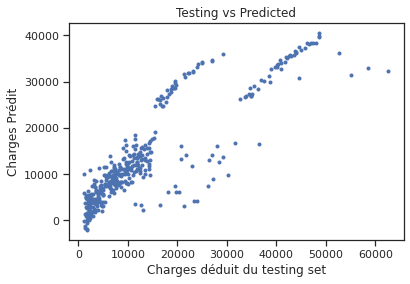

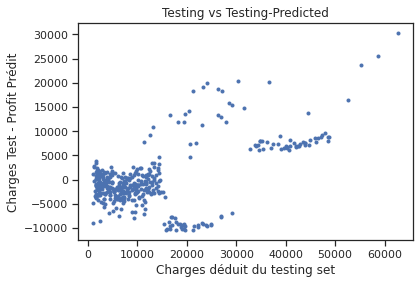

In [67]:
plt.plot(ytest, y_pred,'.')
plt.title("Testing vs Predicted")
plt.xlabel("Charges déduit du testing set")
plt.ylabel("Charges Prédit")
plt.show()

plt.plot(ytest, ytest-y_pred,'.')
plt.title("Testing vs Testing-Predicted")
plt.xlabel("Charges déduit du testing set")
plt.ylabel("Charges Test - Profit Prédit")
plt.show()

In [68]:
import numpy as np
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
#     mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    errors=abs(y_pred-y_true)
    mean_absolute_percent_error=100*(errors/y_true)
    precision=100-np.mean(mean_absolute_percent_error)

    print('explained_variance: ', round(explained_variance,4)) 
    print("absolute error :", errors)
    
#     print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    print("Precision :", round(precision, 4))

In [69]:
type(ytest)

pandas.core.series.Series

In [70]:
regression_results(ytest,y_pred)

explained_variance:  0.7643
absolute error : 17        313.764581
1091      808.804023
273       926.324569
270       877.254965
874       501.704021
            ...     
468     19073.292622
1232     1150.553777
682      6926.367382
86       7779.142021
164      1882.257519
Name: charges, Length: 402, dtype: float64
r2:  0.7642
MAE:  4292.5802
MSE:  38108732.4898
RMSE:  6173.2271
Precision : 53.1158


 ##### <font color="#1d2592"> Préparer le Backward elimination avec le stats librairie

In [71]:
data.head(2)

,smoker_yes,region_northeast,region_northwest,region_southeast,sex_female,age,bmi,children
0,1.0,0.0,0.0,0.0,1.0,19,27.90,0
1,0.0,0.0,0.0,1.0,0.0,18,33.77,1


In [72]:
import numpy as np
xtrain = np.append (arr=np.ones([xtrain.shape[0],1]).astype(int), values = xtrain, axis = 1)

In [73]:
df_xtrain=pd.DataFrame(xtrain, columns=["Dummy", "smoker_yes", "region_northeast", "region_northwest", "region_southeast", "sex_female" ,"age", "bmi", "children"])
df_ytrain=pd.DataFrame(ytrain, columns=["charges"])

In [74]:
x_opt = [0, 1, 2, 3, 4, 5, 6, 7, 8]
regressor = sm.OLS(ytrain, xtrain[:,x_opt]).fit()
reg_0=regressor
print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     334.7
Date:                Wed, 27 Jan 2021   Prob (F-statistic):          3.10e-267
Time:                        00:24:41   Log-Likelihood:                -9471.2
No. Observations:                 936   AIC:                         1.896e+04
Df Residuals:                     927   BIC:                         1.900e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.303e+04   1252.697    -10.403      0.0

In [75]:
x_opt = [0, 1, 2, 3, 4, 6, 7, 8]
regressor = sm.OLS(ytrain, xtrain[:,x_opt]).fit()
reg_1=regressor
print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     382.8
Date:                Wed, 27 Jan 2021   Prob (F-statistic):          1.61e-268
Time:                        00:24:41   Log-Likelihood:                -9471.2
No. Observations:                 936   AIC:                         1.896e+04
Df Residuals:                     928   BIC:                         1.900e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.295e+04   1227.792    -10.548      0.0

In [76]:
x_opt = [0, 1, 2, 3, 6, 7, 8]
regressor = sm.OLS(ytrain, xtrain[:,x_opt]).fit()
reg_2=regressor
print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     446.5
Date:                Wed, 27 Jan 2021   Prob (F-statistic):          1.20e-269
Time:                        00:24:42   Log-Likelihood:                -9471.7
No. Observations:                 936   AIC:                         1.896e+04
Df Residuals:                     929   BIC:                         1.899e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.28e+04   1217.971    -10.507      0.0

In [77]:
x_opt = [0, 1, 2, 6, 7, 8]
regressor = sm.OLS(ytrain, xtrain[:,x_opt]).fit()
reg_3=regressor
print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     535.7
Date:                Wed, 27 Jan 2021   Prob (F-statistic):          7.50e-271
Time:                        00:24:42   Log-Likelihood:                -9472.1
No. Observations:                 936   AIC:                         1.896e+04
Df Residuals:                     930   BIC:                         1.899e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.247e+04   1163.424    -10.715      0.0

In [78]:
x_opt = [0, 1, 6, 7, 8]
regressor = sm.OLS(ytrain, xtrain[:,x_opt]).fit()
reg_4=regressor
print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     666.9
Date:                Wed, 27 Jan 2021   Prob (F-statistic):          1.63e-271
Time:                        00:24:43   Log-Likelihood:                -9473.9
No. Observations:                 936   AIC:                         1.896e+04
Df Residuals:                     931   BIC:                         1.898e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.199e+04   1137.267    -10.541      0.0

#### <font color="#1d2592"> On retient le modèle avec la variable region_northeast inclut car le R²-score ajusté est un peu plus élevé pour ce modèle même si la p-valeur associée à cette variable est 0.059.
> Charges=-1.247e+04 + 2.335e+04*smoker_yes+ 880.1172*region_northeast+244.7259*age+340.0924*bmi+619.1660*children.

#### <font color="#1d2592"> Après la selection des variables sans normalization.

In [79]:
frais.head(2)

,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,age,sex,bmi,children,smoker,region,charges
0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,19,female,27.90,0,yes,southwest,16884.9240
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,18,male,33.77,1,no,southeast,1725.5523


In [80]:
data_2=frais.drop(["charges", "sex", "region", "smoker", "sex_male", "sex_female", "smoker_no", "region_southwest", "region_northwest", "region_southeast", "sex_female", "sex_male"], axis=1)
target_2=frais["charges"]

In [81]:
data_2.head(2)

,smoker_yes,region_northeast,age,bmi,children
0,1.0,0.0,19,27.90,0
1,0.0,0.0,18,33.77,1


In [82]:
xtrain_2, xtest_2, ytrain_2, ytest_2 = train_test_split(data_2, target_2, train_size=0.7, random_state=2)

In [83]:
reg_2 = LinearRegression()
reg_2.fit(xtrain_2, ytrain_2)
score_2= reg_2.score(xtest_2,ytest_2)
y_pred_2=reg_2.predict(xtest_2)

In [84]:
"Ecart à la prédiction en R2_ajusté:{}".format(1 - (1-metrics.r2_score(ytest,y_pred))*(len(data)-1)/(len(data)-xtest.shape[1]-1))

'Ecart à la prédiction en R2_ajusté:0.762815651243478'

In [85]:
print("coefficients for the linear regression with standardization:")
print("---------------------------------------")
print("Intercept: {:.3f}".format(reg_2.intercept_))
print( 
    "\n".join(
        map(
            lambda x:"{1:<8s}: {0:.3f}".format(*x),
            sorted(zip(reg_2.coef_,data_2.columns), key=lambda x:abs(x[0]),reverse=True)
        )
    ) )

coefficients for the linear regression with standardization:
---------------------------------------
Intercept: -12466.156
smoker_yes: 23347.627
region_northeast: 880.117
children: 619.166
bmi     : 340.092
age     : 244.726


#### <font color="#1d2592"> 
> Charges=-12466.156 + 23347.627*smoker_yes+ 880.117*region_northeast+244.7259*age+340.0924*bmi+619.166*children.

In [125]:
xtest_2.shape

(402, 5)

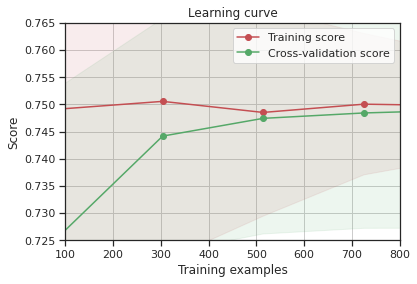

In [128]:
cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=1)
plot_learning_curve(reg_2, "Learning curve", data_2[['smoker_yes','region_northeast','age', 'bmi', 'children']], target_2, ylim=None, cv=cv, train_sizes=np.linspace(.1, 1.0, 5))
plt.ylim(0.725, 0.765)
plt.xlim(100,800)
plt.show()

#### <font color="#1d2592"> Évaluations du modèle.

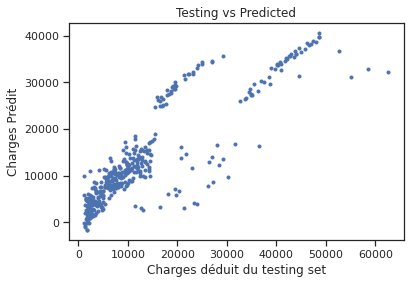

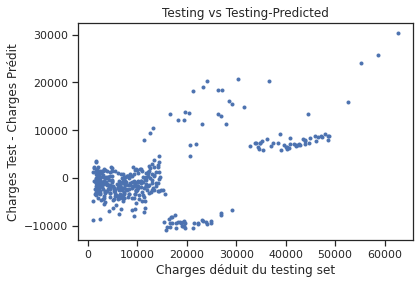

In [86]:
plt.plot(ytest_2, y_pred_2,'.')
plt.title("Testing vs Predicted")
plt.xlabel("Charges déduit du testing set")
plt.ylabel("Charges Prédit")
plt.show()

plt.plot(ytest_2, ytest_2-y_pred_2,'.')
plt.title("Testing vs Testing-Predicted")
plt.xlabel("Charges déduit du testing set")
plt.ylabel("Charges Test - Charges Prédit")
plt.show()

In [87]:
regression_results(ytest_2,y_pred_2)

explained_variance:  0.7651
absolute error : 17        243.011024
1091      732.304942
273       988.998088
270       827.153724
874       420.720371
            ...     
468     19132.428253
1232     1505.193050
682      6434.514756
86       8150.811621
164      1640.895303
Name: charges, Length: 402, dtype: float64
r2:  0.7649
MAE:  4260.9168
MSE:  37994179.7888
RMSE:  6163.9419
Precision : 54.3887


<h1><p style='color:grey; font-size:24px; text-align:center'>MODELE 2 : RANDOM_FOREST </p></h1

<p style='color:grey; font-size:24px; text-align:center'> Encodage </p>

In [131]:
temp_df = pd.get_dummies(df,prefix=['region'], columns=['region'])
temp_df = pd.get_dummies(temp_df,prefix=['sex'],columns=['sex'])
temp_df = pd.get_dummies(temp_df,prefix=['smoker'],columns=['smoker'])
temp_df = temp_df[['age','bmi','children','charges','region_northeast','region_northwest','region_southeast','sex_female','smoker_no']]
temp_df

,age,bmi,children,charges,region_northeast,region_northeast,region_northwest,region_northwest,region_southeast,region_southeast,sex_female,sex_female,smoker_no,smoker_no
0,19,27.900,0,16884.92400,0.0,0,0.0,0,0.0,0,1.0,1,0.0,0
1,18,33.770,1,1725.55230,0.0,0,0.0,0,1.0,1,0.0,0,1.0,1
2,28,33.000,3,4449.46200,0.0,0,0.0,0,1.0,1,0.0,0,1.0,1
3,33,22.705,0,21984.47061,0.0,0,1.0,1,0.0,0,0.0,0,1.0,1
4,32,28.880,0,3866.85520,0.0,0,1.0,1,0.0,0,0.0,0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0.0,0,1.0,1,0.0,0,0.0,0,1.0,1
1334,18,31.920,0,2205.98080,1.0,1,0.0,0,0.0,0,1.0,1,1.0,1
1335,18,36.850,0,1629.83350,0.0,0,0.0,0,1.0,1,1.0,1,1.0,1
1336,21,25.800,0,2007.94500,0.0,0,0.0,0,0.0,0,1.0,1,1.0,1


<p style='color:grey; font-size:24px; text-align:center'> 1er modèle </p>

In [132]:
X_col = []
y_col = []

for colonne in temp_df.columns:
    if colonne != 'charges':
        X_col.append(colonne)
    else : 
        y_col.append(colonne)

X = temp_df[X_col].values
y = temp_df[y_col].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,
                                                     y,
                                                     test_size = 0.3,
                                                     random_state=42,
                                                     stratify=temp_df[['region_northeast','region_northwest','region_southeast','sex_female','smoker_no']]
                                                    )

y_train = y_train.ravel()
y_test = y_test.ravel()

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
print("Accuracy within train :",regressor.score(X_train,y_train))
print("Accuracy within test :",regressor.score(X_test,y_test))

Accuracy within train : 0.9773646087272296
Accuracy within test : 0.8309899235981097


<p style='color:grey; font-size:24px; text-align:center'> Erreur moyenne venant des résidus </p>

In [133]:
df1 = pd.DataFrame(y_test,columns=['y_test'])
df2 = pd.DataFrame(y_pred,columns=['y_pred'])

df_ys = df1.join(df2)

df_ys['difference']=df_ys['y_pred']/df_ys['y_test']

ecart = round(sum(df_ys['difference'])*100/len(df_ys),2)

print('En moyenne, les prédictions sont',ecart,'% des valeurs de test.')
print("")
print("Un écart de",round(sum(df_ys['difference'])*100/len(df_ys))-100,"% est ainsi observé entre les charges prédites et les charges réelles.")

En moyenne, les prédictions sont 110.73 % des valeurs de test.

Un écart de 11 % est ainsi observé entre les charges prédites et les charges réelles.


<p style='color:grey; font-size:24px; text-align:center'> Recherche des paramètres optimaux pour le modèle </p>

In [130]:
from numpy import mean
from numpy import std
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [18]:
# INITIALIZE KFOLD
cv_sets = KFold(n_splits=10, random_state=42, shuffle=True)

# "SCORES" BY CROSS EVALUATION
scores = cross_val_score(regressor, X, y, cv=cv_sets, n_jobs=-1)

# MEAN and STD SCORE
print('Accuracy (Standard Deviation): %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy (Standard Deviation): 0.831 (0.038)


In [19]:
# INITIALIZE A DICT WITH PARAMS
params = {'max_depth':range(1,7),
         }

# INITIALIZE R2 SCORE WITH A Y_PRED NOT ALREADY DEFINED
def performance_metric(y,y_pred): 
    return r2_score(y,y_pred)

# MEASURE PERFORMANCE
scoring_fnc = make_scorer(performance_metric)

# INITIALIZE A GRID_CV OBJECT
grid_cv = GridSearchCV(regressor, params, cv=cv_sets, scoring=scoring_fnc)

# TRAIN GRID_CV OBJECT WITH X_train AND y_train
grid_cv.fit(X_train,y_train)

# FIND BEST MODEL
best_tree = grid_cv.best_estimator_
print(best_tree)

# FIND BEST PARAMS
best_params = grid_cv.best_params_
print(best_params)

RandomForestRegressor(max_depth=4)
{'max_depth': 4}


In [20]:
# INITIALIZE A DICT WITH PARAMS
params = {'n_estimators':range(1,60),
         }

# INITIALIZE R2 SCORE WITH A Y_PRED NOT ALREADY DEFINED
def performance_metric(y,y_pred): 
    return r2_score(y,y_pred)

# MEASURE PERFORMANCE
scoring_fnc = make_scorer(performance_metric)

# INITIALIZE A GRID_CV OBJECT
grid_cv = GridSearchCV(regressor, params, cv=cv_sets, scoring=scoring_fnc)

# TRAIN GRID_CV OBJECT WITH X_train AND y_train
grid_cv.fit(X_train,y_train)

# FIND BEST MODEL
best_tree = grid_cv.best_estimator_
print(best_tree)

# FIND BEST MAX_DEPTH
best_params = grid_cv.best_params_
print(best_params)

RandomForestRegressor(n_estimators=38)
{'n_estimators': 38}


<p style='color:grey; font-size:24px; text-align:center'> Re-création d'un modèle avec les paramètres optimaux </p>

In [27]:
regressor_2 = RandomForestRegressor(n_estimators=38,max_depth=4)
regressor_2.fit(X_train,y_train)
y_pred_2 = regressor_2.predict(X_test)

sub_df1 = pd.DataFrame(y_test,columns=['y_test'])
sub_df2 = pd.DataFrame(y_pred_2,columns=['y_pred_2'])
sub_df_ys = sub_df1.join(sub_df2)

sub_df_ys['difference']=sub_df_ys['y_pred_2']/sub_df_ys['y_test']

sub_ecart = round(sum(sub_df_ys['difference'])*100/len(sub_df_ys),2)

# INITIALIZE KFOLD
cv_sets = KFold(n_splits=10, random_state=42, shuffle=True)
# "SCORES" BY CROSS EVALUATION
scores = cross_val_score(regressor_2, X, y, cv=cv_sets, n_jobs=-1)
# MEAN and STD SCORE
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.854 (0.039)


<p style='color:grey; text-align:center'> Nous observons : </p>
<p style="color:grey; text-align:left"> Le score de précision est supérieur (0.854 > 0.831) pour regressor_2 avec n_estimators = 38 et max_depth = 4, "regressor_2" est donc un modèle plus performant que "regressor", qui fut notre modèle original.</p>

<p style='color:grey; font-size:24px; text-align:center'> Etudes des features les plus importantes</p>

In [28]:
def sort_dictionnary(dict1):
    sorted_values = reversed(sorted(dict1.values())) # Sort the values
    sorted_dict = {}
    for i in sorted_values:
        for k in dict1.keys():
            if dict1[k] == i:
                sorted_dict[k] = dict1[k]
                break
    return sorted_dict

importance={}
for i in range(len(X_col)):
    importance[X_col[i]]=list(regressor_2.feature_importances_)[i]
    
sort_dictionnary(importance)

{'smoker_no': 0.714551846724894,
 'bmi': 0.16085655425870252,
 'age': 0.11644381365914072,
 'children': 0.0066655491790998745,
 'region_northeast': 0.0010279917619011915,
 'sex_female': 0.00023350159216664458,
 'region_southeast': 0.00015240223718306298,
 'region_northwest': 6.834058691195201e-05}

In [29]:
children  = sort_dictionnary(importance)['smoker_no']+sort_dictionnary(importance)['bmi']+sort_dictionnary(importance)['age']+sort_dictionnary(importance)['children']
not_children = sort_dictionnary(importance)['smoker_no']+sort_dictionnary(importance)['bmi']+sort_dictionnary(importance)['age']
print("La variable children a",round((children - not_children)*100,2),"% d'influence sur le résultat")

La variable children a 0.67 % d'influence sur le résultat


In [31]:
best_df = temp_df[['smoker_no','bmi','age','charges']]

X_col = []
y_col = []

for colonne in best_df.columns:
    if colonne != 'charges':
        X_col.append(colonne)
    else : 
        y_col.append(colonne)

X = best_df[X_col].values
y = best_df[y_col].values

X_train, X_test, y_train, y_test = train_test_split (X,
                                                     y,
                                                     test_size = 0.3,
                                                     random_state=42,
                                                     stratify=best_df['smoker_no']
                                                    )

y_train = y_train.ravel()
y_test = y_test.ravel()

regressor_2 = RandomForestRegressor(n_estimators=38,max_depth=4)

regressor_2.fit(X_train,y_train)

y_pred = regressor_2.predict(X_test)

# INITIALIZE KFOLD
cv_sets = KFold(n_splits=10, random_state=42, shuffle=True)

# "SCORES" BY CROSS EVALUATION
scores = cross_val_score(regressor_2, X, y, cv=cv_sets, n_jobs=-1)

# MEAN and STD SCORE
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.852 (0.042)


Le score de précision est sensiblement similaire (variation de 0.002) entre le modèle entrainé par un jeu de donnée complet ($r^2 = 0.854$) et le jeu de donnée épuré des features non significative ($r^2 = 0.852$), ce qui confirme l'idée que **<i>smoker</i>**,**<i>bmi</i>** et **<i>age</i>** sont des variables suffisantes pour prédire **<i>charges</i>**.

<h1><p style='color:grey; font-size:24px; text-align:center'>MODELE DE PREDICTION FINAL</p></h1>

Meilleur Rsquare pour la regression linéaire : 0.740  
Meilleur Rsquare pour le RandomForest : 0.852 

# RandomForest WIN !!!

In [ ]:
import pandas as pd 
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

age = int(input("Enter age"))
bmi = float(input("Enter BMI"))
smoker = int(input("Smoker ? Enter 0 for yes or 1 for no :"))


def find_charges(age,bmi,smoker):
    #DATABASE LOAD
    df = pd.read_csv('https://simplonline-v3-prod.s3.eu-west-3.amazonaws.com/media/file/csv/d51b9368-7437-420c-975c-81cac8790b68.csv')
    sub_df = pd.get_dummies(df,prefix=['smoker'], columns=['smoker'])
    sub_df = sub_df[['smoker_no','bmi','age','charges']]
    
    #CREATING IA
    X_col = []
    y_col = []

    for colonne in best_df.columns:
        if colonne != 'charges':
            X_col.append(colonne)
        else : 
            y_col.append(colonne)

    X = best_df[X_col].values
    y = best_df[y_col].values
    
    X_train, X_test, y_train, y_test = train_test_split (X,
                                                     y,
                                                     test_size = 0.3,
                                                     random_state=42,
                                                     stratify=best_df['smoker_no']
                                                    )

    y_train = y_train.ravel()
    y_test = y_test.ravel()

    regressor_2 = RandomForestRegressor(n_estimators=38,max_depth=4)

    regressor_2.fit(X_train,y_train)

    return int(regressor_2.predict([[smoker,bmi,age]]))

find_charges(age,bmi,smoker)

In [ ]:
cv_sets = KFold(n_splits=10, random_state=42, shuffle=True)
plot_learning_curve(regressor_2, "Learning curve", sub_df[['smoker_no','bmi','age']], sub_df[['charges']], ylim=None, cv=cv, train_sizes=np.linspace(.1, 1.0, 5))
# plt.ylim(0.725, 0.765)
# plt.xlim(100,800)
plt.show()